# Problème noté (TD9 et TD10)

In [1]:
# Pour la gestion du csv
import pandas as pd

# Pour les maths
import numpy as np

# Pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Pour les modèles de machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

La prochaine étape sera donc d'importer le fichier, dans notre cas, nous allons utiliser la librairie pandas dans le but de charger les données par le fichier déjà téléchargé

In [2]:
try:
    df = pd.read_csv('valeursfoncieres-2022.txt', sep = '|', low_memory=False)
except FileNotFoundError:
    print("Erreur lors du chargement du fichier.")

# Après avoir chargé les données, on va les regarder :

In [3]:
df.head(5)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0


# On va maintenant choisir les colonnes à supprimer

On remarque l'existence de nombreuses colonnes et donc de nombreux choix comme variable cible, la plus évidente étant la valeur foncière puisque c'est une valeur numérique qui peut être prédite en fonction des autres données, mais d'un autre côté nous pouvons également prendre le code postal, puisque la prédiction du code postal peut être possible grâce aux autres données comme le prix, la taille de la surface etc.

In [4]:
df.isnull().sum() / len(df) * 100

Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.649888
No voie                        34.733621
B/T/Q                          95.374019
Type de voie                   36.984294
Code voie                       1.026398
Voie                            1.029290
Code postal                     1.029816
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.824295
Section                         0.004075
No plan                         0.000000
No Volume                      99.765792
1er lot         

# Voilà notre choix des colonnes que nous allons conserver:
- Date de mutation : C'est la date à laquelle l'acte de mutation a été signé, au format JJ/MM/AAAA.
- Nature de la mutation : Il s'agit du type de mutation, tel que vente, vente en l'état futur d'achèvement, vente de terrain à bâtir, adjudication, expropriation ou échange.
- Valeur foncière : C'est le montant ou l'évaluation déclaré(e) dans le cadre d'une mutation à titre onéreux. Il représente la valeur du bien immobilier. On utilise cette colonne comme label Y pour nos modèles supervisés
- B/T/Q (Indice de répétition) : Il s'agit d'un indice de répétition qui peut être utilisé pour identifier des informations supplémentaires sur la voie ou l'emplacement du bien immobilier.
- Code voie : Ce sont des informations sur la voie, le type de voie, par exemple "Rue", "Avenue", etc.
- Code postal : C'est le code postal de la localisation du bien immobilier.
- Nombre de lots : C'est le nombre total de lots par disposition, c'est-à-dire le nombre de lots associés à une transaction immobilière.
- Code Type local : C'est une description plus détaillée du type de local.
- Surface réelle bâti : C'est la surface réelle du bâtiment, mesurée au sol entre les murs ou séparations.
- Nombre de pièces principales : C'est le nombre de pièces principales dans le bien immobilier, excluant les cuisines, salles d'eau et dépendances.
- Surface terrain : C'est la contenance du terrain.

Ces colonnes ont été sélectionnées car elles contiennent des informations essentielles et pertinentes pour votre analyse des prix des appartements. Elles couvrent des aspects tels que la localisation, les caractéristiques du bien, les surfaces et les détails sur la transaction.

In [5]:
# Liste des colonnes à conserver
colonnes_a_garder = [
    "Date mutation",
    "Nature mutation",
    "Valeur fonciere",
    "B/T/Q",
    "Type de voie",
    "Code postal",
    "Nombre de lots",
    "Type local",
    "Surface reelle bati",
    "Nombre pieces principales",
    "Surface terrain"
]

# Sélectionner les colonnes à partir du DataFrame
df = df[colonnes_a_garder]

In [6]:
df.head(5)

,Date mutation,Nature mutation,Valeur fonciere,B/T/Q,Type de voie,Code postal,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2022,Vente,"55000,00",NaN,RUE,1000.0,1,Appartement,24.0,1.0,NaN
1,03/01/2022,Vente,"143000,00",NaN,NaN,1480.0,0,NaN,NaN,NaN,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,1480.0,0,NaN,NaN,NaN,88.0
3,03/01/2022,Vente,"143000,00",NaN,RTE,1480.0,1,Appartement,140.0,3.0,NaN
4,04/01/2022,Vente,"300,00",NaN,NaN,1480.0,0,NaN,NaN,NaN,510.0


In [7]:
df.columns

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'B/T/Q',
       'Type de voie', 'Code postal', 'Nombre de lots', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain'],
      dtype='object')

# Il nous faut maintenant gérer les valeurs NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803885 entries, 0 to 3803884
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date mutation              object 
 1   Nature mutation            object 
 2   Valeur fonciere            object 
 3   B/T/Q                      object 
 4   Type de voie               object 
 5   Code postal                float64
 6   Nombre de lots             int64  
 7   Type local                 object 
 8   Surface reelle bati        float64
 9   Nombre pieces principales  float64
 10  Surface terrain            float64
dtypes: float64(4), int64(1), object(6)
memory usage: 319.2+ MB


In [9]:
df.isnull().sum() / len(df) * 100

Date mutation                 0.000000
Nature mutation               0.000000
Valeur fonciere               0.649888
B/T/Q                        95.374019
Type de voie                 36.984294
Code postal                   1.029816
Nombre de lots                0.000000
Type local                   39.918478
Surface reelle bati          39.973396
Nombre pieces principales    39.973396
Surface terrain              33.830912
dtype: float64

On remarque que la majorité des colonnes n'ont que très peu de valeurs nulles, mais que cependant la colonne "B/T/Q" possède 95% de valeurs nulles, que les colonnes "Type de voie", "Code type local", "Type local", "Surface reelle bati", "Nombre pieces principales", et que certaines colonnes numériques comme "Valeur fonciere" possède quelques valeurs nulles. Nous allons donc remplacer les données manquantes dans les colonnes "Type de voie", "Code type local", "Type local", "Surface reelle bati", "Nombre pieces principales" par des "None" car nous ne connaissons pas la situation. Pour le cas de la colonne "B/T/Q", nous allons faire un mapping avec 1 pour le cas "NaN", 2 pour "B", 3 pour "T" et 4 pour "Q". Et pour la colonne "Valeur fonciere" nous allons remplacer les valeurs nulles par la median de la colonne.

In [10]:
# Définition du dictionnaire de correspondance
mapping = {"B": 2, "T": 3, "Q": 4}

# Application de la transformation sur la colonne 'B/T/Q'
df["B/T/Q"] = df["B/T/Q"].map(mapping)

# Remplacement des chaînes de caractères "NaN" par des valeurs NaN
df = df.replace("NaN", np.nan)

# Remplacement des valeurs NaN par 1 dans la colonne 'B/T/Q'
df["B/T/Q"] = df["B/T/Q"].fillna(1)

# Remplacer la virgule par un point décimal dans la colonne "Valeur fonciere" et convertir la colonne en float64
df["Valeur fonciere"] = df["Valeur fonciere"].str.replace(",", ".").astype(float)
# Remplir les valeurs manquantes avec la médiane
df["Valeur fonciere"] = df["Valeur fonciere"].fillna(df["Valeur fonciere"].median())

# Remplir les valeurs manquantes dans la colonne "Surface terrain" avec la médiane
df["Surface terrain"] = df["Surface terrain"].fillna(df["Surface terrain"].median())

# Remplir les valeurs manquantes dans la colonne "Nombre pieces principales" avec la médiane
df["Nombre pieces principales"] = df["Nombre pieces principales"].fillna(df["Nombre pieces principales"].median())

# Remplir les valeurs manquantes dans la colonne "Surface reelle bati" avec la médiane
df["Surface reelle bati"] = df["Surface reelle bati"].fillna(df["Surface reelle bati"].median())

In [11]:
df.isnull().sum() / len(df) * 100

Date mutation                 0.000000
Nature mutation               0.000000
Valeur fonciere               0.000000
B/T/Q                         0.000000
Type de voie                 36.984294
Code postal                   1.029816
Nombre de lots                0.000000
Type local                   39.918478
Surface reelle bati           0.000000
Nombre pieces principales     0.000000
Surface terrain               0.000000
dtype: float64

# Les représentations graphiques

## Boxplot pour déterminer les valeurs aberrantes
Nous avons considéré qu'il ne pouvait y avoir des valeurs aberrantes surtout sur la valeur fonciere, la surface terrain et la surface reelle bati donc nous n'avons regardé que ces valeurs-là.

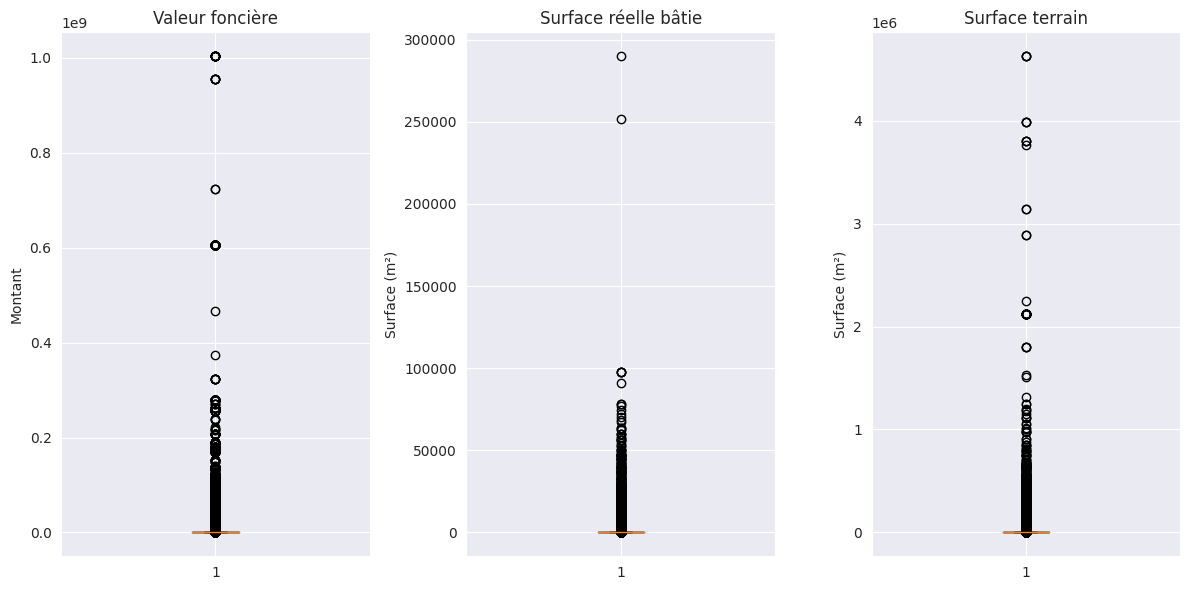

In [12]:
# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Boxplot pour la colonne "Valeur foncière"
axs[0].boxplot(df["Valeur fonciere"])
axs[0].set_title("Valeur foncière")
axs[0].set_ylabel("Montant")

# Boxplot pour la colonne "Surface réelle bâtie"
axs[1].boxplot(df["Surface reelle bati"])
axs[1].set_title("Surface réelle bâtie")
axs[1].set_ylabel("Surface (m²)")

# Boxplot pour la colonne "Surface terrain"
axs[2].boxplot(df["Surface terrain"])
axs[2].set_title("Surface terrain")
axs[2].set_ylabel("Surface (m²)")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

A présent nous voyons qu'il y a des valeurs aberrantes à supprimer donc nous utilisons une fonction pour supprimer les valeurs aberrantes

In [13]:
"""def supprimer_valeurs_aberrantes(df, col_name):
    # Calculer les limites des valeurs aberrantes (Q1 - 1.5*IQR et Q3 + 1.5*IQR)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Supprimer les valeurs aberrantes
    df_cleaned = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

    return df_cleaned

df = supprimer_valeurs_aberrantes(df, 'Valeur fonciere')
df = supprimer_valeurs_aberrantes(df, 'Surface reelle bati')
df = supprimer_valeurs_aberrantes(df, 'Surface terrain') #A ne pas faire car cela fausse la précision des modèles"""

"def supprimer_valeurs_aberrantes(df, col_name):\n    # Calculer les limites des valeurs aberrantes (Q1 - 1.5*IQR et Q3 + 1.5*IQR)\n    Q1 = df[col_name].quantile(0.25)\n    Q3 = df[col_name].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    # Supprimer les valeurs aberrantes\n    df_cleaned = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]\n\n    return df_cleaned\n\ndf = supprimer_valeurs_aberrantes(df, 'Valeur fonciere')\ndf = supprimer_valeurs_aberrantes(df, 'Surface reelle bati')\ndf = supprimer_valeurs_aberrantes(df, 'Surface terrain') #A ne pas faire car cela fausse la précision des modèles"

(On regarde les boxplots après avoir changé :) plus le cas

In [14]:
"""# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Boxplot pour la colonne "Valeur foncière"
axs[0].boxplot(df["Valeur fonciere"])
axs[0].set_title("Valeur foncière")
axs[0].set_ylabel("Montant")

# Boxplot pour la colonne "Surface réelle bâtie"
axs[1].boxplot(df["Surface reelle bati"])
axs[1].set_title("Surface réelle bâtie")
axs[1].set_ylabel("Surface (m²)")

# Boxplot pour la colonne "Surface terrain"
axs[2].boxplot(df["Surface terrain"])
axs[2].set_title("Surface terrain")
axs[2].set_ylabel("Surface (m²)")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()"""

'# Créer une figure et des sous-graphiques\nfig, axs = plt.subplots(1, 3, figsize=(12, 6))\n\n# Boxplot pour la colonne "Valeur foncière"\naxs[0].boxplot(df["Valeur fonciere"])\naxs[0].set_title("Valeur foncière")\naxs[0].set_ylabel("Montant")\n\n# Boxplot pour la colonne "Surface réelle bâtie"\naxs[1].boxplot(df["Surface reelle bati"])\naxs[1].set_title("Surface réelle bâtie")\naxs[1].set_ylabel("Surface (m²)")\n\n# Boxplot pour la colonne "Surface terrain"\naxs[2].boxplot(df["Surface terrain"])\naxs[2].set_title("Surface terrain")\naxs[2].set_ylabel("Surface (m²)")\n\n# Ajuster l\'espacement entre les sous-graphiques\nplt.tight_layout()\n\n# Afficher le graphique\nplt.show()'

On cherche maintenant à voir la répartition des données de chaque colonne pour pouvoir mapper toutes ces dernieres de sorte à les rendre utilisables

In [15]:
sample_df = df.sample(n=1000)  # Échantillon aléatoire de 1000 lignes pour les tests

## Diagramme à barres de la nature des mutations.

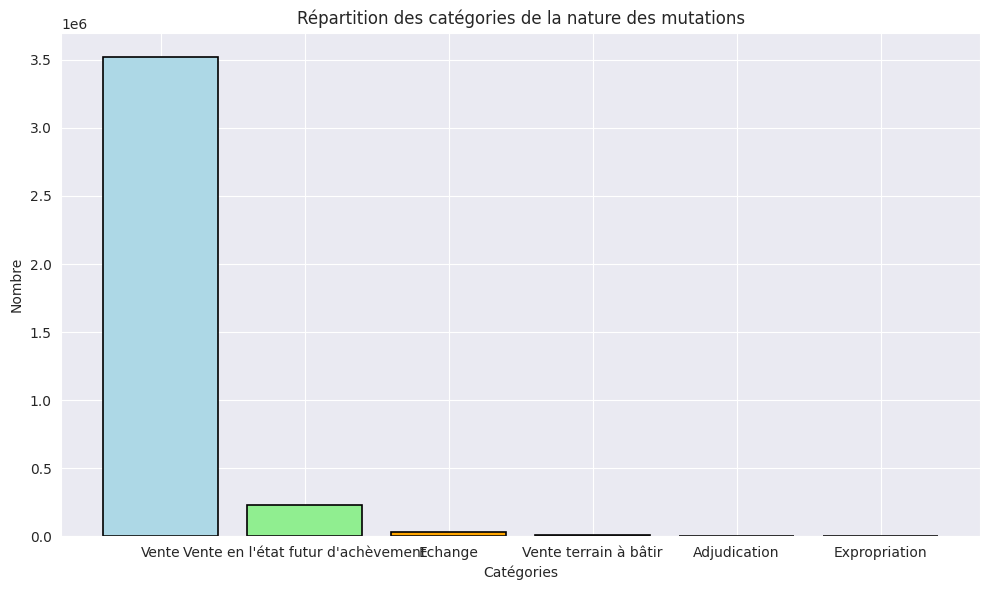

In [16]:
plt.figure(figsize=(10, 6))
counts = df['Nature mutation'].value_counts()
labels = counts.index
colors = ['lightblue', 'lightgreen', 'orange', 'pink']
explode = (0.05, 0.05, 0.1, 0.1, 0.1)
plt.bar(labels, counts, color=colors, edgecolor='black', linewidth=1.2)
# Personnalisation des axes et du titre
plt.xlabel('Catégories')
plt.ylabel('Nombre')
plt.title('Répartition des catégories de la nature des mutations')
# Ajustement des marges
plt.tight_layout()
plt.show()

On remarque qu'il n'y a que 6 valeurs différentes : cela signifie que nous aurons 6 valeurs à mapper à savoir Vente, Vente en l'état futur d'achèvement, Echange, Vente terrain à bâtir, Adjudication, Expropriation

## Mapping des natures des mutations :

In [17]:
naturemapping={"Vente":1, "Vente en l'état futur d'achèvement":2, "Echange":3, "Vente terrain à bâtir":4, "Adjudication":5, "Expropriation":6}
df['Nature mutation'] = df['Nature mutation'].map(naturemapping)

In [18]:
#print(df['Nature mutation'])

## Diagramme des dates de mutation

La répartition des mois de transaction

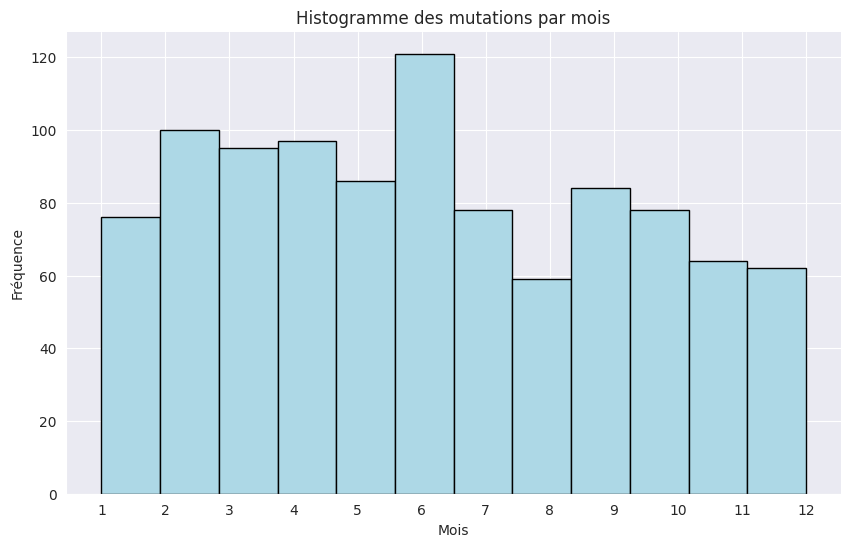

In [19]:
plt.figure(figsize=(10, 6))
sample_df['Date mutation'] = pd.to_datetime(sample_df['Date mutation'], dayfirst=True)  # Spécifier dayfirst=True pour le format jour/mois/année
sample_df['Month'] = sample_df['Date mutation'].dt.month
colors = ['lightblue']
edgecolor = 'black'
plt.hist(sample_df['Month'], bins=12, color=colors, edgecolor=edgecolor)
plt.xlabel('Mois')
plt.ylabel('Fréquence')
plt.title('Histogramme des mutations par mois')
# Personnalisation des axes
plt.xticks(range(1, 13))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### Changement des données de mois en données par saison utilisables

In [20]:
dfz =pd.DataFrame(pd.to_datetime(df['Date mutation'], dayfirst=True))
dfz['Date mutation'] = dfz['Date mutation'].dt.strftime('%m')
datemapping = {"01":1, "02":1,"03":2,"04":2, "05":2, "06":3,"07":3,"08":3, "09":4, "10":4,"11":4,"12":1}
df['Date mutation'] = dfz['Date mutation'].map(datemapping)

In [21]:
print(df['Date mutation'])

0          1
1          1
2          1
3          1
4          1
          ..
3803880    1
3803881    1
3803882    1
3803883    1
3803884    4
Name: Date mutation, Length: 3803885, dtype: int64


Histogramme de la valeur foncière.

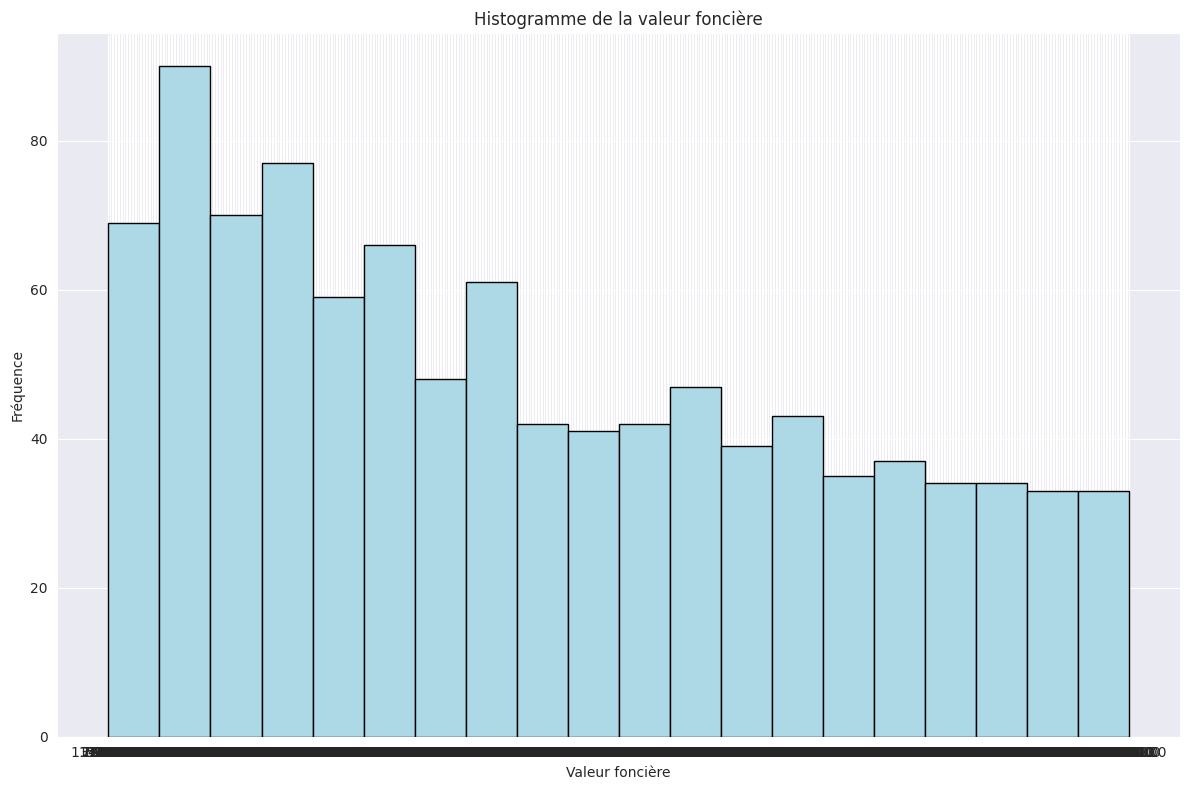

In [22]:
# Convertir les valeurs de la colonne "Valeur fonciere" en str
sample_df['Valeur fonciere'] = sample_df['Valeur fonciere'].astype(str)
plt.figure(figsize=(12, 8))  # Augmenter la taille du graphique
# Tracer l'histogramme avec 20 intervalles (bins)
plt.hist(sample_df['Valeur fonciere'], bins=20, color='lightblue', edgecolor='black')
# Personnalisation des axes et du titre
plt.xlabel('Valeur foncière')
plt.ylabel('Fréquence')
plt.title('Histogramme de la valeur foncière')
# Ajustement des marges
plt.tight_layout()
plt.show()

Diagrammes à barres pour chaque colonne catégorielle.

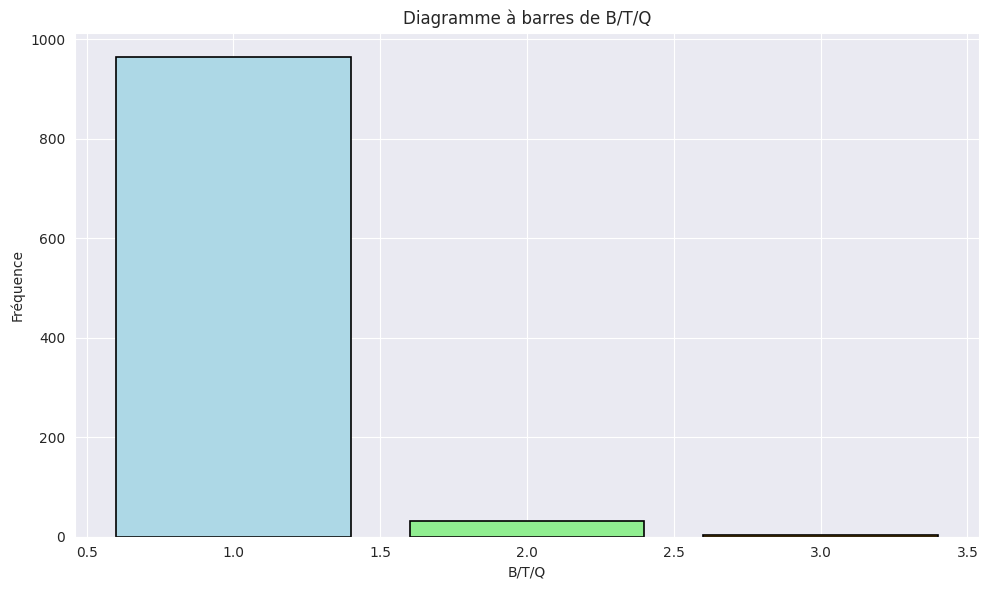

1=Rien
2=Bis
3=Ter
4=Quarter


In [23]:
plt.figure(figsize=(10, 6))
counts = sample_df['B/T/Q'].value_counts()
labels = counts.index
colors = ['lightblue', 'lightgreen', 'orange', 'pink']
plt.bar(labels, counts, color=colors, edgecolor='black', linewidth=1.2)
# Personnalisation des axes et du titre
plt.xlabel('B/T/Q')
plt.ylabel('Fréquence')
plt.title('Diagramme à barres de B/T/Q')
# Ajustement des marges
plt.tight_layout()
plt.show()
print("1=Rien\n2=Bis\n3=Ter\n4=Quarter")

Nuage de points pour la relation entre ces deux colonnes.

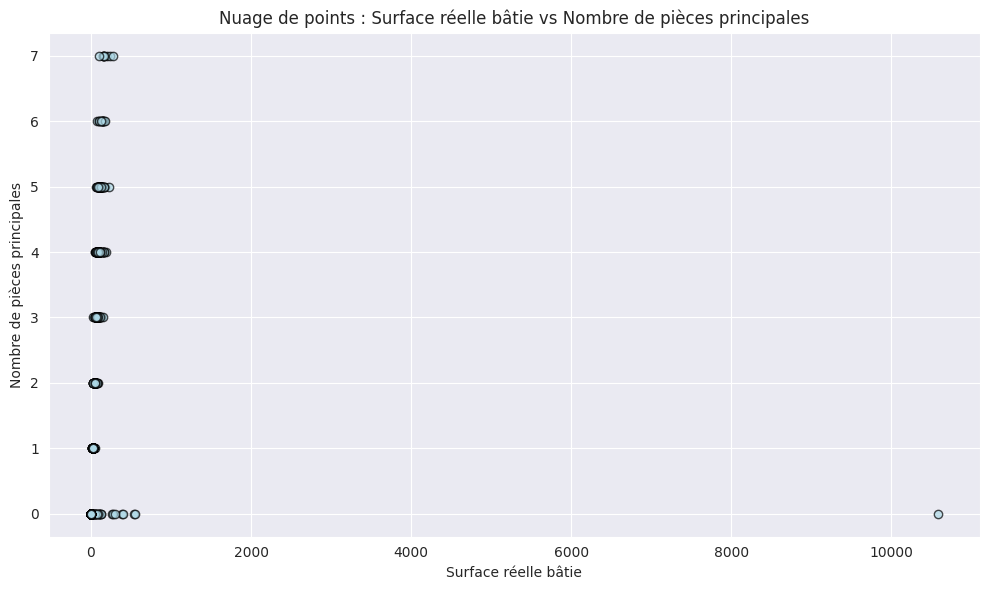

In [24]:
plt.figure(figsize=(10, 6))
# Tracer le nuage de points
plt.scatter(sample_df['Surface reelle bati'], sample_df['Nombre pieces principales'], color='lightblue', edgecolor='black', alpha=0.7)
# Personnalisation des axes et du titre
plt.xlabel('Surface réelle bâtie')
plt.ylabel('Nombre de pièces principales')
plt.title('Nuage de points : Surface réelle bâtie vs Nombre de pièces principales')
# Ajustement des marges
plt.tight_layout()
plt.show()

# Normalisation

In [25]:
colonnes_numeriques = ['Valeur fonciere', 'Nombre de lots', 'B/T/Q', 'Surface reelle bati', 'Nombre pieces principales', 'Code postal', "Nature mutation", "Date mutation", "Surface terrain"]
# Remplacer les valeurs 'None' par NaN dans les colonnes numériques
df[colonnes_numeriques] = df[colonnes_numeriques].replace('None', np.nan)
# Créez une instance de MinMaxScaler
scaler = MinMaxScaler()
# Appliquez la normalisation aux colonnes numériques
df[colonnes_numeriques] = scaler.fit_transform(df[colonnes_numeriques])

# Matrice de corrélation

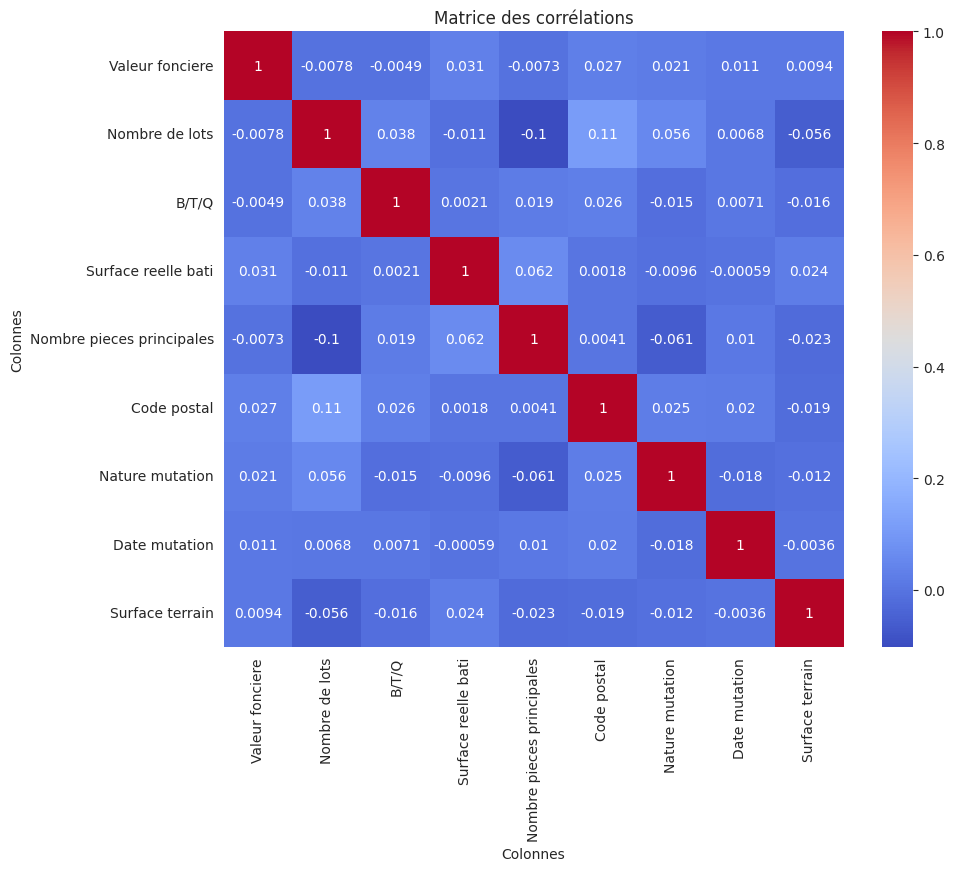

In [26]:
# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = ['Valeur fonciere', 'Nombre de lots', 'B/T/Q', 'Surface reelle bati', 'Nombre pieces principales', 'Code postal', "Nature mutation", "Date mutation", "Surface terrain"]

df_numerique = df[colonnes_numeriques]

# Calculer la matrice des corrélations
matrice_corr = df_numerique.corr()

# Créer un heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm')

# Ajouter des titres aux axes
plt.xlabel('Colonnes')
plt.ylabel('Colonnes')

# Ajouter un titre au graphique
plt.title('Matrice des corrélations')

# Afficher le graphique
plt.show()

# Choix des modèles

In [27]:
print(df.columns)

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'B/T/Q',
       'Type de voie', 'Code postal', 'Nombre de lots', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain'],
      dtype='object')


In [28]:
# Sélection des colonnes d'entrée et de sortie
features = ['Nombre de lots', 'B/T/Q', 'Surface reelle bati', 'Nombre pieces principales', 'Code postal', "Nature mutation", "Date mutation", "Surface terrain"]
target = 'Valeur fonciere'  # Variable cible

# Filtrage des données pour exclure les valeurs non numériques
filtered_df = df.copy()

# Suppression des lignes contenant des valeurs non numériques
filtered_df = filtered_df.dropna(subset=features)

# Sélection des colonnes d'entrée et de sortie après le filtrage
X = filtered_df[features]
y = filtered_df[target]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèles
models = {
    'Ridge': Ridge(),
    'Lasso': LassoCV(),
    'Régression linéaire': LinearRegression(),
    'K-NN': KNeighborsRegressor()
}

# Boucle pour entraîner et évaluer chaque modèle
for model_name, model in models.items():
    print(f"\nEntraînement et évaluation du modèle {model_name}")

    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Évaluation des performances du modèle
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Coefficient of Determination (R²):", r2)



Entraînement et évaluation du modèle Ridge
Mean Squared Error (MSE): 2.813923497330877e-05
Coefficient of Determination (R²): 0.003057007015951796

Entraînement et évaluation du modèle Lasso
Mean Squared Error (MSE): 2.8139699267927754e-05
Coefficient of Determination (R²): 0.0030405575542832297

Entraînement et évaluation du modèle Régression linéaire
Mean Squared Error (MSE): 2.813556247469141e-05
Coefficient of Determination (R²): 0.003187119713286779

Entraînement et évaluation du modèle K-NN
Mean Squared Error (MSE): 8.429654996607296e-06
Coefficient of Determination (R²): 0.701346341145662


Modèle Ridge : Faible MSE, R² très faible, possible sous-performance dans la capture des relations entre les variables.

Modèle Lasso : MSE similaire à Ridge, R² proche de zéro ou négatif, difficulté à capturer les relations entre les variables.

Modèle K-NN : Faible MSE, R² élevé (environ 70%), bonne adaptation aux données et capture des relations entre les variables.

Modèle Régression linéaire : MSE similaire à Ridge et Lasso, R² très faible, difficulté à expliquer la variabilité des données.

Le modèle K-NN semble être le plus performant avec une faible MSE et un R² élevé. Les modèles Ridge et Lasso présentent des performances similaires, mais avec une capacité explicative plus faible. Le modèle de régression linéaire a une capacité explicative limitée.

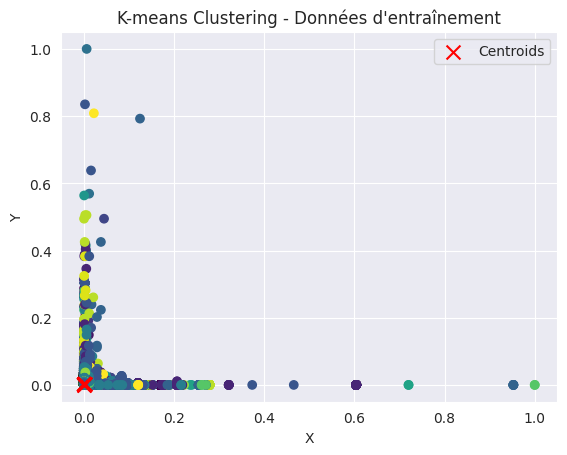

In [29]:
# Données d'entraînement
feature = ['Valeur fonciere','Nombre de lots', 'B/T/Q', 'Surface reelle bati', 'Nombre pieces principales', 'Code postal', "Nature mutation", "Date mutation", "Surface terrain"]
X_train = np.array(df[feature].dropna())

# Création du modèle K-means avec 2 clusters
kmeans = KMeans(n_clusters=20, n_init=10)

# Entraînement du modèle
kmeans.fit(X_train)

# Affichage des données d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering - Données d\'entraînement')
plt.legend()
plt.show()

L'utilisation de l'algorithme K-Means n'est pas optimale lorsque nous avons un grand nombre de données, car cela peut rendre la représentation et l'interprétation graphique difficiles en raison de la densité élevée des points.